In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#####  Read Data 

In [16]:
df=pd.read_csv("telecom_customer_churn.csv")
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [92]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churn Category Numeric
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,Competitor
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,Dissatisfaction
54,0094-OIFMO,Female,78,No,1,North Hollywood,91605,34.207295,-118.400022,0,...,95.00,1120.30,0.0,120,127.49,1367.79,Churned,Dissatisfaction,Product dissatisfaction,Dissatisfaction
67,0112-QWPNC,Male,61,Yes,0,Valyermo,93563,34.395830,-117.734568,1,...,84.35,4059.35,0.0,0,1937.95,5997.30,Churned,Competitor,Competitor offered higher download speeds,Competitor
77,0125-LZQXK,Male,42,No,0,Big Oak Flat,95305,37.818589,-120.256995,0,...,101.35,1553.95,0.0,0,688.80,2242.75,Churned,Attitude,Attitude of service provider,Attitude


##### 1) Data Cleaning

In [93]:
df.fillna(method='ffill', inplace=True)  
df.dropna(inplace=True)  

In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df['Total Charges'] = df['Total Charges'].astype(float)
df['Total Refunds'] = df['Total Refunds'].astype(float)

In [96]:
print(df.head())

   Customer ID  Gender  Age Married  Number of Dependents             City  \
2   0004-TLHLJ    Male   50      No                     0       Costa Mesa   
3   0011-IGKFF    Male   78     Yes                     0         Martinez   
54  0094-OIFMO  Female   78      No                     1  North Hollywood   
67  0112-QWPNC    Male   61     Yes                     0         Valyermo   
77  0125-LZQXK    Male   42      No                     0     Big Oak Flat   

    Zip Code   Latitude   Longitude  Number of Referrals  ...  Monthly Charge  \
2      92627  33.645672 -117.922613                    0  ...           73.90   
3      94553  38.014457 -122.115432                    1  ...           98.00   
54     91605  34.207295 -118.400022                    0  ...           95.00   
67     93563  34.395830 -117.734568                    1  ...           84.35   
77     95305  37.818589 -120.256995                    0  ...          101.35   

   Total Charges Total Refunds  Total Extra 

##### 2)  check if null value are present in there

In [17]:
df.isnull

<bound method DataFrame.isnull of      Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Nu

##### 3) Drop the null values

In [18]:
df.dropna(inplace=True)

##### 4) Information about the Data set

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 2 to 7039
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        681 non-null    object 
 1   Gender                             681 non-null    object 
 2   Age                                681 non-null    int64  
 3   Married                            681 non-null    object 
 4   Number of Dependents               681 non-null    int64  
 5   City                               681 non-null    object 
 6   Zip Code                           681 non-null    int64  
 7   Latitude                           681 non-null    float64
 8   Longitude                          681 non-null    float64
 9   Number of Referrals                681 non-null    int64  
 10  Tenure in Months                   681 non-null    int64  
 11  Offer                              681 non-null    object 
 12

##### 5) Shape of the Data set

In [20]:
df.shape

(681, 38)

##### 6) Describe the colunm 

In [30]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,49.513950,0.091043,93432.795888,35.984644,-119.618649,0.512482,18.828194,25.374053,24.904552,81.107930,1718.956388,1.897841,7.400881,483.696520,2208.155947
std,17.842782,0.454318,1797.498929,2.456799,2.093748,1.057288,20.459030,14.408589,18.462952,19.731049,2036.681801,8.036772,25.149540,674.973035,2606.179714
min,19.000000,0.000000,90001.000000,32.555828,-124.240051,0.000000,1.000000,1.090000,2.000000,-9.000000,42.900000,0.000000,0.000000,1.130000,46.920000
25%,33.000000,0.000000,92122.000000,33.888560,-121.578701,0.000000,2.000000,12.400000,12.000000,70.800000,169.450000,0.000000,0.000000,43.030000,233.920000
50%,51.000000,0.000000,93251.000000,35.490705,-119.286833,0.000000,10.000000,25.770000,21.000000,84.200000,825.700000,0.000000,0.000000,172.240000,1033.840000
75%,64.000000,0.000000,95222.000000,37.980057,-117.792202,1.000000,30.000000,37.830000,29.000000,95.200000,2596.150000,0.000000,0.000000,634.840000,3258.690000
max,80.000000,4.000000,96150.000000,41.962127,-115.431225,9.000000,71.000000,49.980000,85.000000,116.200000,8127.600000,49.060000,150.000000,3508.820000,11084.840000


##### 7) location of the colunm Data information

In [22]:
df.iloc[0]

Customer ID                                             0004-TLHLJ
Gender                                                        Male
Age                                                             50
Married                                                         No
Number of Dependents                                             0
City                                                    Costa Mesa
Zip Code                                                     92627
Latitude                                                 33.645672
Longitude                                              -117.922613
Number of Referrals                                              0
Tenure in Months                                                 4
Offer                                                      Offer E
Phone Service                                                  Yes
Avg Monthly Long Distance Charges                            33.65
Multiple Lines                                                

In [23]:
print(df["Churn Category"].unique())

df.shape[0]

['Competitor' 'Dissatisfaction' 'Attitude' 'Price' 'Other']


681

##### 8) Total colunm in the data set

In [24]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

##### 9) What is the distribution of gender among customers?

Gender
Male      351
Female    330
Name: count, dtype: int64


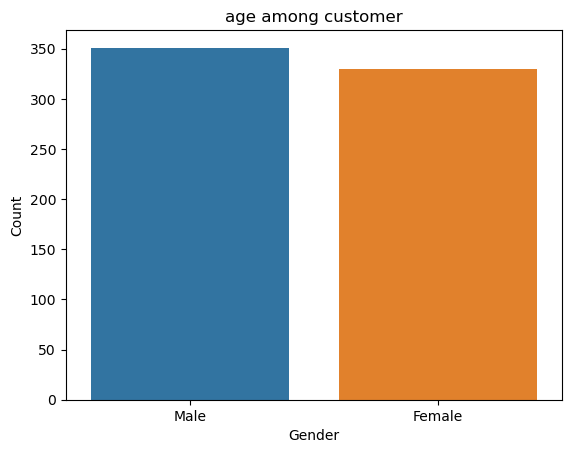

In [28]:
gd = df['Gender'].value_counts()
print(gd)
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('age among customer')
plt.show()

##### 10) How does age vary among customers?

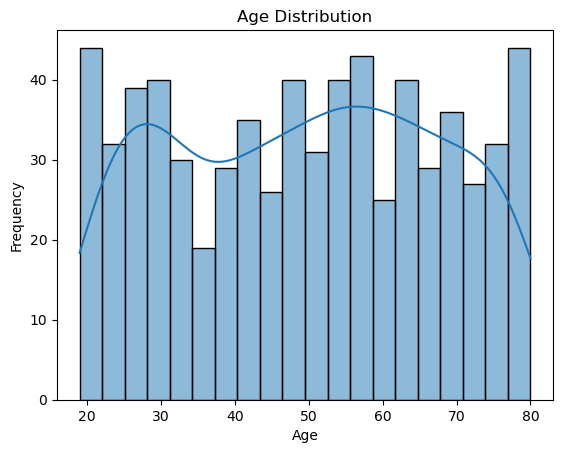

In [27]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### 11) What percentage of customers are married?

In [ ]:
married_percentage = (df['Married'].value_counts(normalize=True) * 100).loc['Yes']
print("Percentage of customers who are married:", married_percentage)

Percentage of customers who are married: 35.97650513950074



##### 13) How does marital status relate to customer churn?

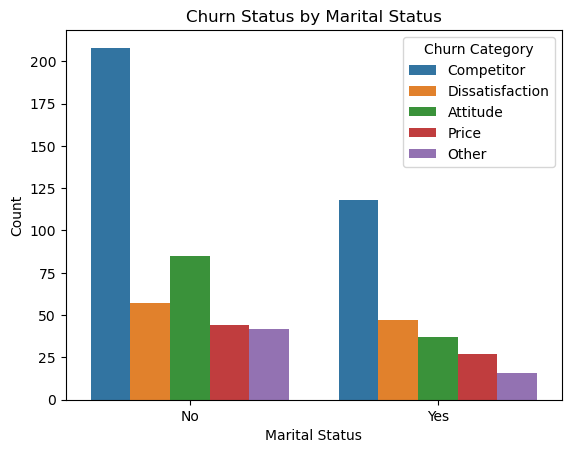

In [34]:
sns.countplot(x='Married', hue='Churn Category', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Churn Status by Marital Status')
plt.legend(title='Churn Category')
plt.show()

##### 14) correlation between age, monthly charges, and total revenue?

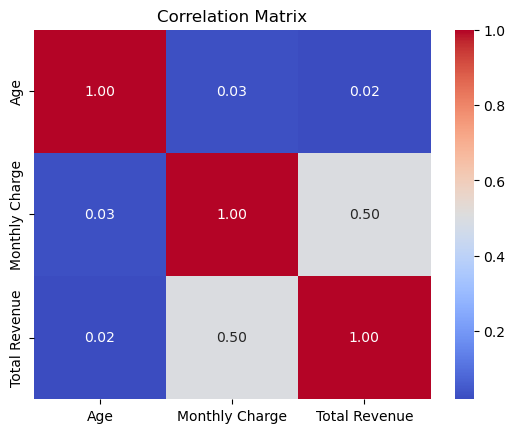

In [35]:
corr_matrix = df[['Age', 'Monthly Charge', 'Total Revenue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##### 15) average number of referrals made by customers?

In [37]:
avg_referrals = np.mean(df['Number of Referrals'])
avg_referrals

0.5124816446402349

##### 16) overall churn rate among customers in the dataset?

In [43]:
churn_rate = df['Churn Category'].value_counts(normalize=True)
churn_rate

Churn Category
Competitor         0.478708
Attitude           0.179148
Dissatisfaction    0.152717
Price              0.104258
Other              0.085169
Name: proportion, dtype: float64

##### 17) correlation between age and churn rate?

In [51]:
age_churn_corr = df[['Age', 'Churn Category']].groupby('Churn Category').mean()
age_churn_corr


,Age
Churn Category,
Attitude,47.803279
Competitor,49.383436
Dissatisfaction,48.413462
Other,48.724138
Price,55.309859


##### 18) Impact of Marital Status on Churn Rate

In [53]:
marital_churn = df.groupby('Married')['Churn Category'].value_counts(normalize=True).unstack()
marital_churn


Churn Category,Attitude,Competitor,Dissatisfaction,Other,Price
Married,,,,,
No,0.194954,0.477064,0.130734,0.096330,0.100917
Yes,0.151020,0.481633,0.191837,0.065306,0.110204


##### 19) Average Age of Churned vs. Stayed Customers

In [56]:
avg_age_churned = df[df['Churn Category'] == 'Churned']['Age'].mean()
avg_age_stayed = df[df['Churn Category'] == 'Stayed']['Age'].mean()
print(avg_age_churned)
print(avg_age_stayed)

nan
nan


##### 20) Distribution of Customers Across Cities

In [58]:
city_distribution = df['City'].value_counts()
city_distribution


City
San Diego         64
Los Angeles       28
San Jose          14
San Francisco     12
Fallbrook         10
                  ..
Porter Ranch       1
Adin               1
Corona Del Mar     1
Brownsville        1
Riverbank          1
Name: count, Length: 394, dtype: int64

##### 21) Geographical Patterns in Customer Churn

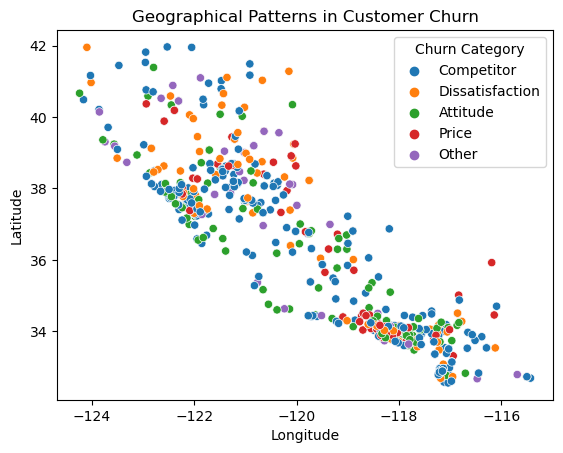

In [59]:
sns.scatterplot(x='Longitude', y='Latitude', hue='Churn Category', data=df)
plt.title('Geographical Patterns in Customer Churn')
plt.show()

##### 22) Impact of Number of Dependents on Churn Rate

In [61]:
dependent_churn = df.groupby('Number of Dependents')['Churn Category'].value_counts(normalize=True).unstack()
dependent_churn

Churn Category,Attitude,Competitor,Dissatisfaction,Other,Price
Number of Dependents,,,,,
0,0.178737,0.485362,0.146379,0.086287,0.103236
1,0.076923,0.384615,0.384615,NaN,0.153846
2,0.222222,0.222222,0.222222,0.111111,0.222222
3,0.333333,0.333333,0.222222,0.111111,NaN
4,NaN,1.000000,NaN,NaN,NaN


##### 23) Distribution of Payment Methods Among Customers

In [63]:
payment_distribution = df['Payment Method'].value_counts()
payment_distribution


Payment Method
Bank Withdrawal    509
Credit Card        125
Mailed Check        47
Name: count, dtype: int64

##### 24) Relationship Between Payment Method and Churn Rate

In [65]:
payment_churn = df.groupby('Payment Method')['Churn Category'].value_counts(normalize=True).unstack()
payment_churn


Churn Category,Attitude,Competitor,Dissatisfaction,Other,Price
Payment Method,,,,,
Bank Withdrawal,0.176817,0.487230,0.153242,0.082515,0.100196
Credit Card,0.224000,0.384000,0.160000,0.096000,0.136000
Mailed Check,0.085106,0.638298,0.127660,0.085106,0.063830


##### 25) Monthly Charges Variation by Gender

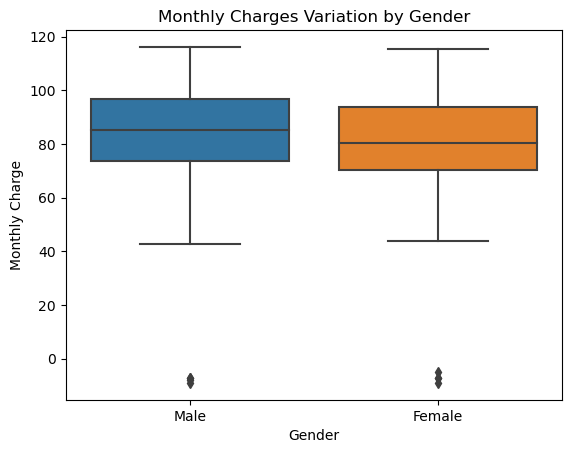

In [66]:
sns.boxplot(x='Gender', y='Monthly Charge', data=df)
plt.title('Monthly Charges Variation by Gender')
plt.show()

##### 26) Outliers in Total Charges Column

In [71]:
total_charges = df['Total Charges'].sum()
total_charges


1170609.3

##### 27) How does the number of referrals relate to customer churn?

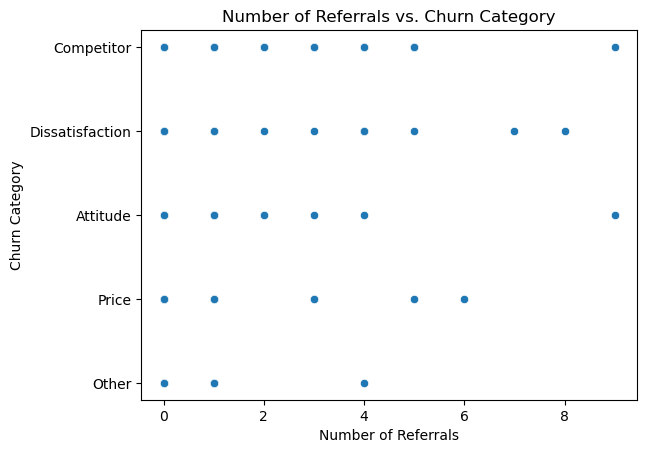

In [73]:
sns.scatterplot(x='Number of Referrals', y='Churn Category', data=df)
plt.title('Number of Referrals vs. Churn Category')
plt.xlabel('Number of Referrals')
plt.ylabel('Churn Category')
plt.show()

##### 28) Is there a difference in churn rate based on the churn reason provided?

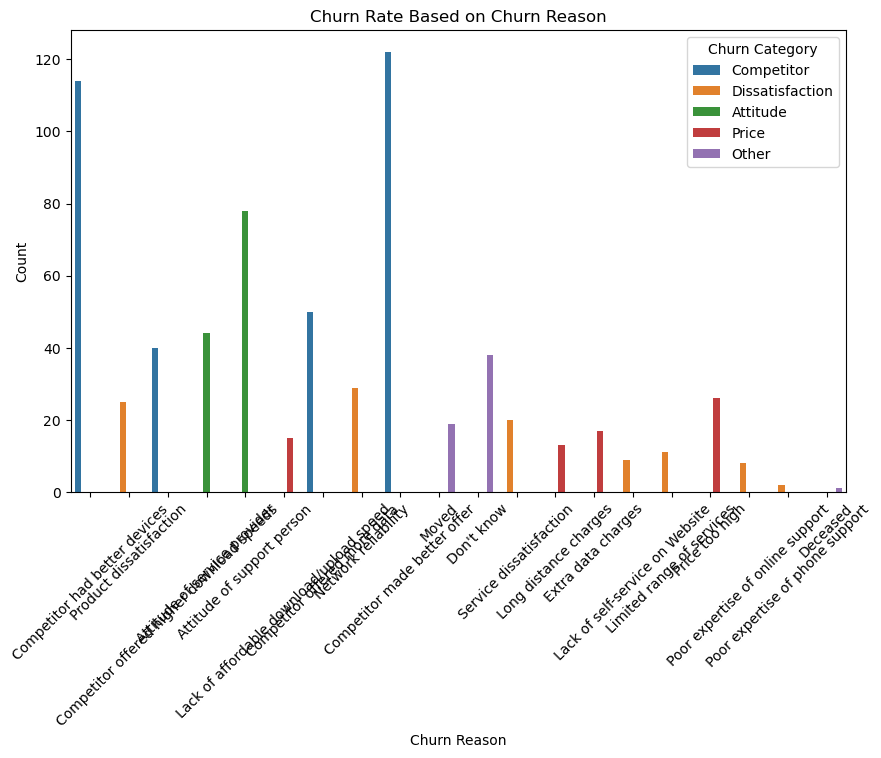

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Reason', hue='Churn Category', data=df)
plt.title('Churn Rate Based on Churn Reason')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn Category')
plt.show()

##### 29) What are the top cities with the highest churn rates?

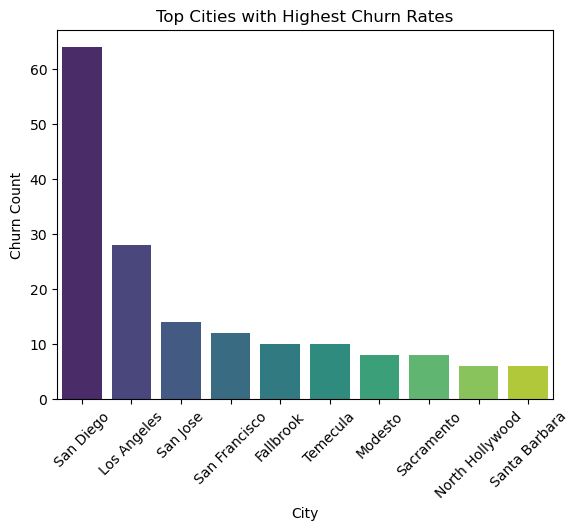

In [77]:
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top Cities with Highest Churn Rates')
plt.xlabel('City')
plt.ylabel('Churn Count')
plt.xticks(rotation=45)
plt.show()

##### 30) How do total refunds impact customer satisfaction and churn?

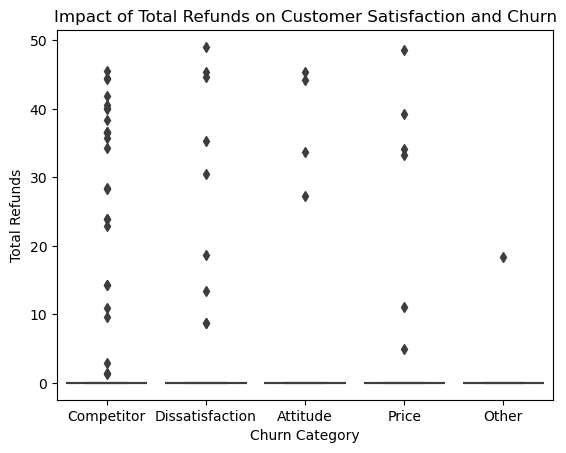

In [85]:
sns.boxplot(x='Churn Category', y='Total Refunds', data=df)
plt.title('Impact of Total Refunds on Customer Satisfaction and Churn')
plt.xlabel('Churn Category')
plt.ylabel('Total Refunds')
plt.show()

##### 31) What is the average tenure (in months) of customers who churned versus those who stayed?

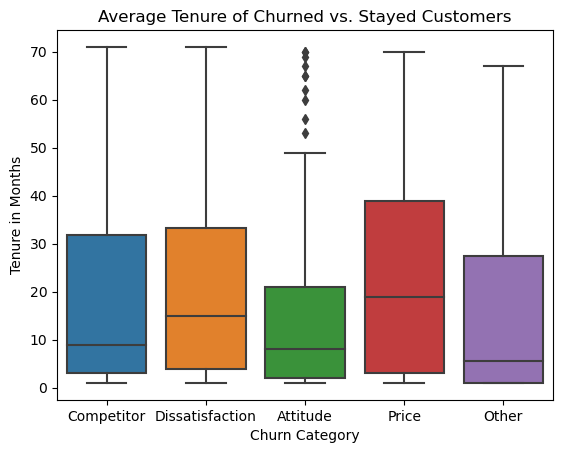

In [90]:
sns.boxplot(x='Churn Category', y='Tenure in Months', data=df)
plt.title('Average Tenure of Churned vs. Stayed Customers')
plt.xlabel('Churn Category')
plt.ylabel('Tenure in Months')
plt.show()